# EDA of Covid data for Mecklenburg County
---
** WORK IN PROGRESS **
- Author: Laura Dahlberg
- Created on: January 8, 2021

### About the Data:
Data Source: "Centers for Disease Control and Prevention, COVID-19 Response. COVID-19 Case Surveillance Data Access, Summary, and Limitations (version 12-31-2020)" To access this dataset you need to request permission from the [CDC](https://data.cdc.gov/Case-Surveillance/COVID-19-Case-Surveillance-Restricted-Access-Detai/mbd7-r32t) <br>
<br>
CDC disclosure: "The CDC does not take responsibility for the scientific validity or accuracy of methodology, results, statistical analyses, or conclusions presented." 

In [1]:
import shutil
import datetime
from dateutil import relativedelta
import pandas as pd
from pathlib import Path
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
from matplotlib import cm
%matplotlib inline

In [2]:
ROOT = Path("./")
DATA = ROOT/'data'
IMAGES = ROOT/'images'
# [f for f in ROOT.iterdir()]
# [f for f in DATA.iterdir()]

print('ROOT =', ROOT)
print('DATA =', DATA)
print('IMAGES =', IMAGES)

ROOT = .
DATA = data
IMAGES = images


In [3]:
%ls {DATA}

 Volume in drive C has no label.
 Volume Serial Number is FCBC-A9FB

 Directory of C:\Users\laura\covid-19\covid-19_analysis_NC\data

04/15/2021  12:15 PM    <DIR>          .
04/15/2021  12:15 PM    <DIR>          ..
01/07/2021  11:10 PM        15,318,162 MECK_COVID_Cases_Restricted_Detailed_12312020.csv
04/15/2021  12:15 PM        27,795,787 MECK_covid_dataset_restricted_03312021-copy.csv
01/25/2021  04:24 PM             8,742 weekly_covid19_report_mecknc.csv
               3 File(s)     43,122,691 bytes
               2 Dir(s)  223,785,631,744 bytes free


### 0. Reading File

In [4]:
df = pd.read_csv(DATA/'MECK_COVID_Cases_Restricted_Detailed_12312020.csv')
pd.set_option('display.max_columns', None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55801 entries, 0 to 55800
Data columns (total 32 columns):
race_ethnicity_combined    55645 non-null object
current_status             55801 non-null object
cdc_case_earliest_dt       55801 non-null object
cdc_report_dt              55801 non-null object
sex                        55767 non-null object
onset_dt                   22927 non-null object
pos_spec_dt                55784 non-null object
hosp_yn                    55801 non-null object
icu_yn                     55801 non-null object
death_yn                   55801 non-null object
hc_work_yn                 55586 non-null object
pna_yn                     55801 non-null object
abxchest_yn                55801 non-null object
acuterespdistress_yn       55801 non-null object
mechvent_yn                55801 non-null object
fever_yn                   55801 non-null object
sfever_yn                  55801 non-null object
chills_yn                  55801 non-null object
myalgia_y

### Looking at the Data

This is one row of the data to get an idea of what I'm working with.

In [5]:
# df.head(2)

In [6]:
# df.death_yn.unique()
# df['death_yn']

### Setting Up Colormaps
---

In [7]:
my_cmap = plt.get_cmap('viridis')

### Total Cases
---

In [8]:
## Total cases in Mecklenburg County
total_cases =df['cdc_case_earliest_dt'].count()
meck_population = 1110356
## Meck pop: 1110356. 2019 census. source: ## https://www.census.gov/search-results.html?searchType=web&cssp=SERP&q=population%20mecklenburg

print('Total COVID-19 Cases:', total_cases)
print('Total Mecklenburg Population:', meck_population, '\n')

Total COVID-19 Cases: 55801
Total Mecklenburg Population: 1110356 



### Percentage of Mecklenburg Population with Covid
---

In [9]:
## percentage of Mecklenburg Population with Covid

data = {'cases': [total_cases], 
        'meck_pop': [meck_population]}
county = pd.DataFrame(data)
county['cases_p'] = ((county['cases'] * 100) / county['meck_pop']).round(2)
county

,cases,meck_pop,cases_p
0,55801,1110356,5.03


### Covid Outcomes
---
Deaths and Survivals

In [10]:
## Total Deaths and Survivals
outcome = pd.DataFrame(df['death_yn'].value_counts())
outcome['percentage']= df['death_yn'].value_counts(normalize=True).round(4)*(100)
outcome = outcome.rename(columns={'death_yn': 'count'}, index={'No': 'Surv', 'Yes': 'Deaths'})
outcome

,count,percentage
Surv,55238,98.99
Deaths,544,0.97
Missing,18,0.03
Unknown,1,0.00


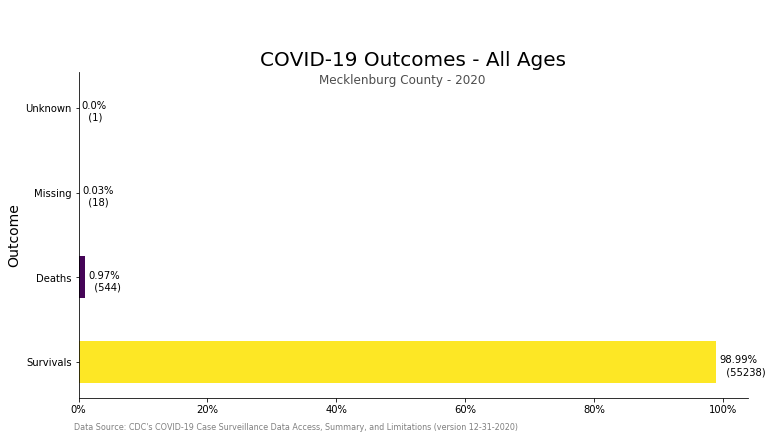

In [11]:
## horizontal barchart covid outcomes
qtys = outcome['count']
pct = outcome['percentage']
y_labels = ['Survivals', 'Deaths', 'Missing', 'Unknown']

y = np.arange(len(y_labels))

width = 0.50
fig, ax = plt.subplots(figsize=(12,6))

bar_colors = lambda pct: (pct - np.min(pct)) / (np.max(pct) - np.min(pct))

rects = ax.barh(y, pct, width, label='percentage outcomes', color=my_cmap(bar_colors(qtys)))

plt.yticks(y, y_labels);

# # Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_title('\n\nCOVID-19 Outcomes - All Ages', fontsize =20)
fig.suptitle('\n\n\nMecklenburg County - 2020', color='0.3')
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Outcome', fontsize=14)

plt.text(-0.7, -0.8, "Data Source: CDC's COVID-19 Case Surveillance Data Access, Summary, and Limitations (version 12-31-2020)",
         color='grey', fontsize=(8))

## reference: https://stackoverflow.com/questions/34292076/pandas-bar-plot-how-to-annotate-grouped-horizontal-bar-charts
def autolabel(rects, qtys):
    for rect, qty in zip(rects, qtys):
        width = rect.get_width()
        ax.text(width + 0.5, rect.get_y() + rect.get_height()/5.,
        f'{(width)}%\n  ({qty})', fontsize=10)

autolabel(rects, qtys)

## Save chart as png file https://stackoverflow.com/questions/33616557/barplot-savefig-returning-an-attributeerror
# ax.figure.savefig(IMAGES/'covid19_outcomes_meck.png', bboxinches='tight', dpi=200);

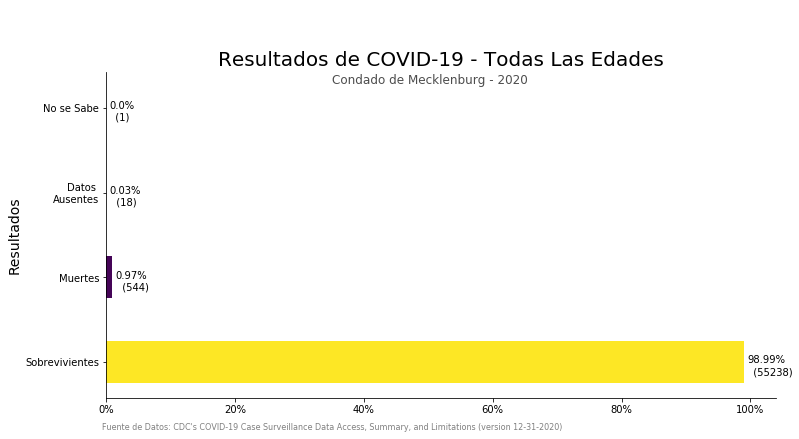

In [12]:
## SPANISH plotting outcome count values

## horizontal barchart covid outcomes - all ages
qtys = outcome['count']
pct = outcome['percentage']
y_labels = ['Sobrevivientes', 'Muertes', 'Datos \nAusentes', 'No se Sabe']

y = np.arange(len(y_labels))

width = 0.50
fig, ax = plt.subplots(figsize=(12,6))

bar_colors = lambda pct: (pct - np.min(pct)) / (np.max(pct) - np.min(pct))

rects = ax.barh(y, pct, width, label='percentage outcomes', color=my_cmap(bar_colors(qtys)))

plt.yticks(y, y_labels);

# # Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_title('\n\nResultados de COVID-19 - Todas Las Edades', fontsize =20)
fig.suptitle('\n\n\nCondado de Mecklenburg - 2020', color='0.3')
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Resultados', fontsize=14)

plt.text(-0.7, -0.8, "Fuente de Datos: CDC's COVID-19 Case Surveillance Data Access, Summary, and Limitations (version 12-31-2020)",
         color='grey', fontsize=(8))

## reference: https://stackoverflow.com/questions/34292076/pandas-bar-plot-how-to-annotate-grouped-horizontal-bar-charts
def autolabel(rects, qtys):
    for rect, qty in zip(rects, qtys):
        width = rect.get_width()
        ax.text(width + 0.5, rect.get_y() + rect.get_height()/5.,
        f'{(width)}%\n  ({qty})', fontsize=10)

autolabel(rects, qtys)

## Save chart as png file https://stackoverflow.com/questions/33616557/barplot-savefig-returning-an-attributeerror
# ax.figure.savefig(IMAGES/'covid19_outcomes_meck-ESP.png', bboxinches='tight', dpi=200);

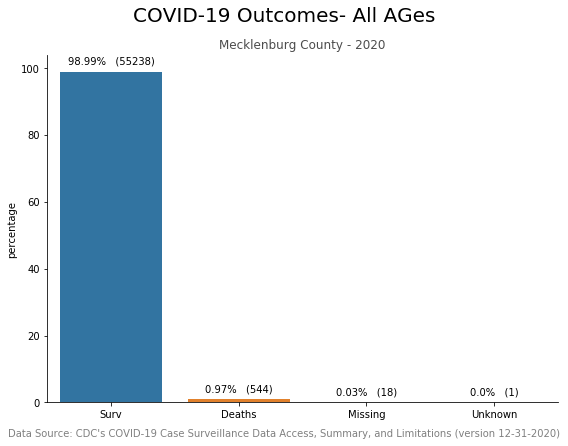

In [13]:
## another way to plot outcome - vertical bars

## https://stackoverflow.com/questions/65655829/absolute-values-and-percentage-values-side-by-side-in-bar-chart-matplotlib/65725322#65725322
x_axis = outcome.index
# x_axis = ['MJO Active', 'MJO Inactive']
# x_axis
y_axis = outcome['percentage']
# y_axis

fig, ax = plt. subplots(figsize=(8,6))
rects = sns.barplot(x_axis, y_axis, linewidth=0)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.suptitle('COVID-19 Outcomes- All AGes', fontsize =20)
ax.set_title('\n\nMecklenburg County - 2020', color='0.3')
text_bottom = fig.text(0.50, -0.02, "Data Source: CDC's COVID-19 Case Surveillance Data Access, Summary, and Limitations (version 12-31-2020)", 
                      ha='center', va='bottom', wrap=True, color='grey')


values = outcome['count']

for rect, perc, vals in zip(rects.patches, y_axis, values):
    rects.annotate(f"{perc}%   ({vals})", (rect.get_x() + rect.get_width() / 2., rect.get_height()),
                  ha='center', va='center', fontsize=10, color='black', xytext=(0,10),
                  textcoords='offset points')
plt.tight_layout()

### Total Covid Outcomes by Age Group - Count and Percentage
---
Deaths and Survivals


In [14]:
## totals Outcomes By Age group (oba)
oba = df.groupby(['age_group','death_yn'])['death_yn'].count().unstack().fillna(0)
oba = oba.rename(columns = {'No': 'surv', 'Yes':'deaths'})
oba[['Missing', 'surv', 'Unknown', 'deaths']] = oba[['Missing', 'surv', 'Unknown', 'deaths']].astype(int)

## Add Grand total
oba['total'] = oba[['Missing', 'surv', 'Unknown', 'deaths']].sum(axis=1).astype(int)

## Add % values for missing (miss_p) survival (surv_p),  unknown (unkn_p), deaths (dths_p), total (totl_p)
## percentages by row, within each age group
oba['miss_p'] = ((oba['Missing']*100)/oba['total']).round(1)
oba['surv_p'] = ((oba['surv']*100)/oba['total']).round(1)
oba['unkn_p'] = ((oba['Unknown']*100)/oba['total']).round(1)
oba['dths_p'] = ((oba['deaths']*100)/oba['total']).round(1)
oba['totl_p'] = (oba['total']*100)/oba['total']

oba.reset_index()

death_yn,age_group,Missing,surv,Unknown,deaths,total,miss_p,surv_p,unkn_p,dths_p,totl_p
0,0 - 9 Years,1,2904,0,0,2905,0.0,100.0,0.0,0.0,100.0
1,10 - 19 Years,4,5715,0,0,5719,0.1,99.9,0.0,0.0,100.0
2,20 - 29 Years,8,13493,1,2,13504,0.1,99.9,0.0,0.0,100.0
3,30 - 39 Years,2,10749,0,3,10754,0.0,100.0,0.0,0.0,100.0
4,40 - 49 Years,0,8701,0,22,8723,0.0,99.7,0.0,0.3,100.0
5,50 - 59 Years,1,7015,0,46,7062,0.0,99.3,0.0,0.7,100.0
6,60 - 69 Years,1,3800,0,70,3871,0.0,98.2,0.0,1.8,100.0
7,70 - 79 Years,1,1754,0,145,1900,0.1,92.3,0.0,7.6,100.0
8,80+ Years,0,1091,0,256,1347,0.0,81.0,0.0,19.0,100.0


### Deaths & Survivals Percentage by Age Group
---


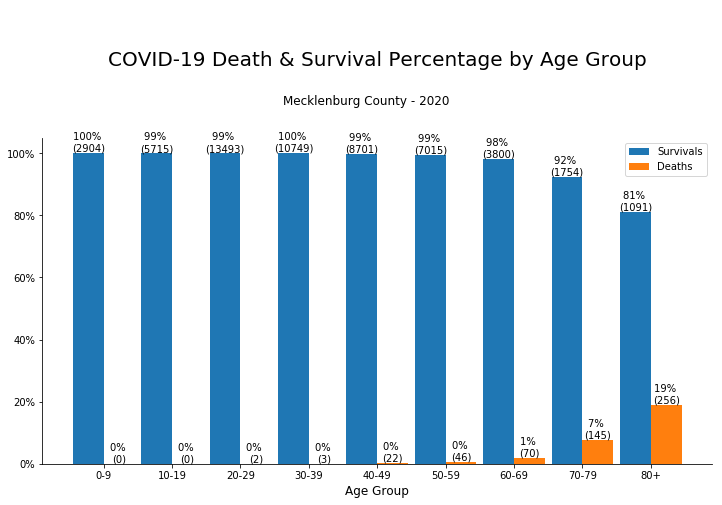

In [15]:
## plotting oba % values by age group
surv_perc = oba['surv_p']
deaths_perc = oba['dths_p']
x_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']

x= np.arange(len(x_labels))
width = 0.45 ##bars width

fig, ax = plt.subplots(figsize=(12,6))
rects1 = ax.bar(x, surv_perc, width, label= 'Survivals')
rects2 = ax.bar(x + width, deaths_perc,width, label='Deaths')

plt.xticks(x + width /2, x_labels);

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('\n\nCOVID-19 Death & Survival Percentage by Age Group\n\n\n', fontsize =20)
fig.suptitle('Mecklenburg County - 2020')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_xlabel('Age Group', fontsize=12)
ax.legend(['Survivals', 'Deaths'])

survivors = oba['surv']
deaths = oba['deaths']

def autolabels(rects, qtys):
    for rect, qty in zip(rects, qtys):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2.,1. * height,
               f'{int(height)}% \n({qty})',
                ha='center', va='bottom')
autolabels(rects1, survivors)
autolabels(rects2, deaths)

## Save chart as png file
# ax.figure.savefig(IMAGES/'death_surv_by_age.png', bbox_inches='tight', dpi=200);

### Total Deaths by Age Group
---

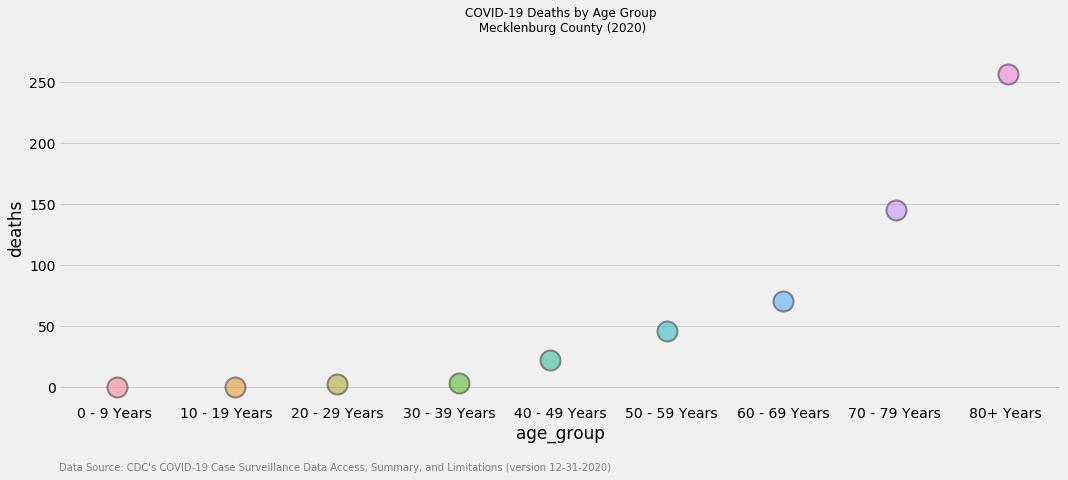

In [16]:
with plt.style.context('fivethirtyeight'):
    ax = plt.subplots(figsize =(16,6))
    ax = sns.stripplot(x='age_group', y='deaths', 
                   data=oba.reset_index(),
                  size=20, linewidth=2, alpha = 0.6)
ax.set_title('COVID-19 Deaths by Age Group\n Mecklenburg County (2020)\n');

plt.annotate("Data Source: CDC's COVID-19 Case Surveillance Data Access, Summary, and Limitations (version 12-31-2020)", 
             (0,0), (0, -60), color='grey', xycoords='axes fraction', textcoords='offset points', va='top');

## save chart to file
# ax.figure.savefig(IMAGES/'deaths_by age.png', bbox_inches='tight', dpi=200);

## reference https://www.dunderdata.com/blog/view-all-available-matplotlib-styles

### Total Cases by Age Group
---

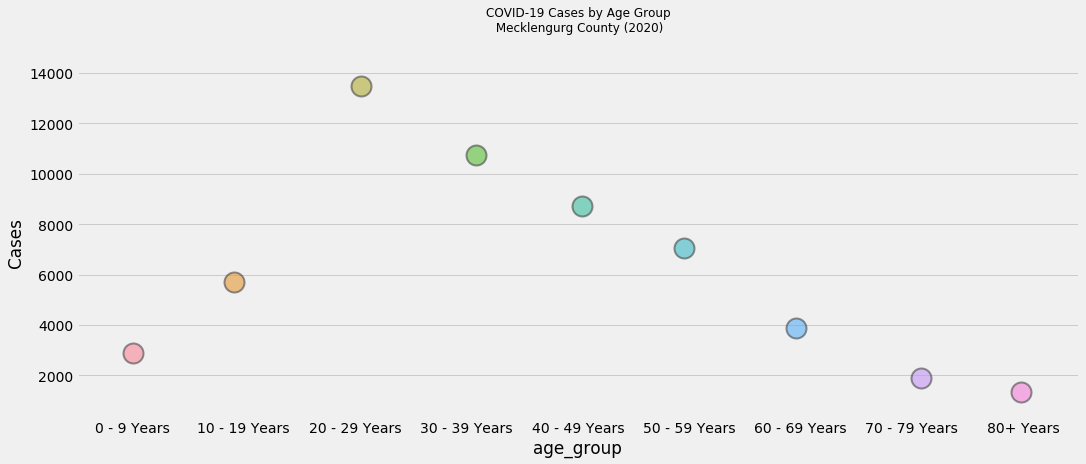

In [17]:
with plt.style.context('fivethirtyeight'):
    ax = plt.subplots(figsize =(16,6))
    ax = sns.stripplot(x='age_group', y='total', 
                   data=oba.reset_index(),
                   size=20, linewidth=2, alpha=0.6)
ax.set_title('COVID-19 Cases by Age Group\n Mecklengurg County (2020)\n\n');
plt.ylabel('Cases');

## save chart to file
# ax.figure.savefig(IMAGES/'total_cases_by_age.png', bbox_inches='tight', dpi=200);

### Cases vs. Deaths by Age Group
---

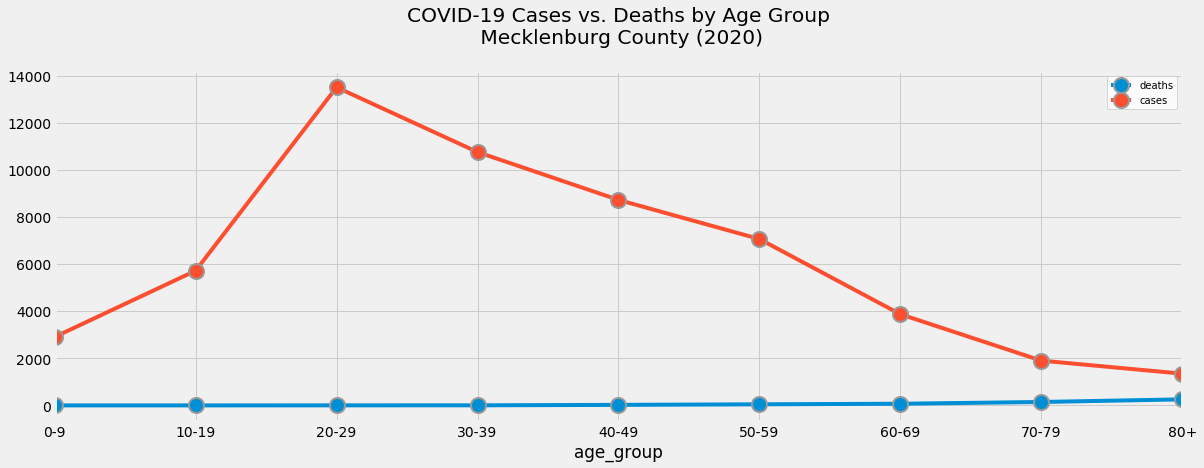

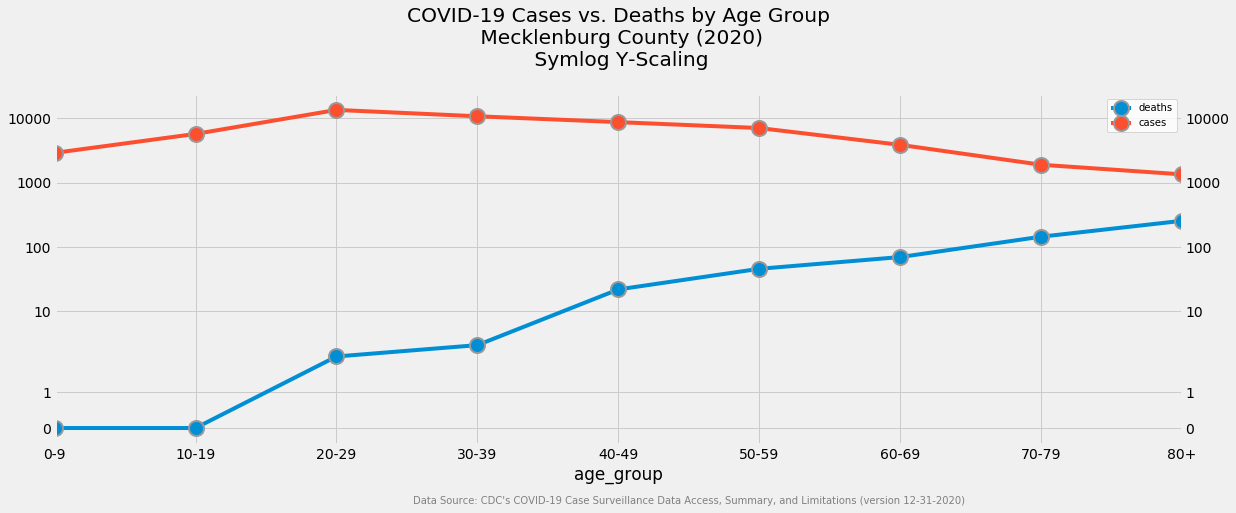

In [18]:
## *** TO DO: save both charts as one image PNG file *** ##
  #######################################################
with plt.style.context('fivethirtyeight'):
    ax0 = oba.reset_index().plot(x='age_group',
                       y=['deaths', 'total'], figsize=(18,6),
                      title='COVID-19 Cases vs. Deaths by Age Group\n Mecklenburg County (2020)\n',
                           marker='o', markersize=15, markeredgewidth=2, markeredgecolor='0.6')

ax0.set_xticklabels(['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']);
ax0.legend(['deaths', 'cases']);
# ax0.text(4.50, -0.5, "Data Source: CDC's COVID-19 Case Surveillance Data Access, Summary, and Limitations (version 12-31-2020)",
#                ha='center', va='bottom', wrap=True, color='grey');

with plt.style.context('fivethirtyeight'):
    ax1 = oba.reset_index().plot(x='age_group',
                       y=['deaths', 'total'], figsize=(18,6),
                      title='COVID-19 Cases vs. Deaths by Age Group\n Mecklenburg County (2020)\n Symlog Y-Scaling\n',
                                 marker='o', markersize=15, markeredgewidth=2, markeredgecolor='0.6')
plt.yscale("symlog")

ax1.set_xticklabels(['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']);
ax1.set_yticklabels([0, 1, 10, 100, 1000, 10000]);
ax1.tick_params(labelright=True)
ax1.legend(['deaths', 'cases']);

ax1.text(4.50, -2.5, "Data Source: CDC's COVID-19 Case Surveillance Data Access, Summary, and Limitations (version 12-31-2020)",
               ha='center', va='bottom', wrap=True, color='grey');


## save pict to file
# ax.figure.savefig(IMAGES/'cases_vs_deaths_by_age.png', bbox_inches='tight', dpi=200);

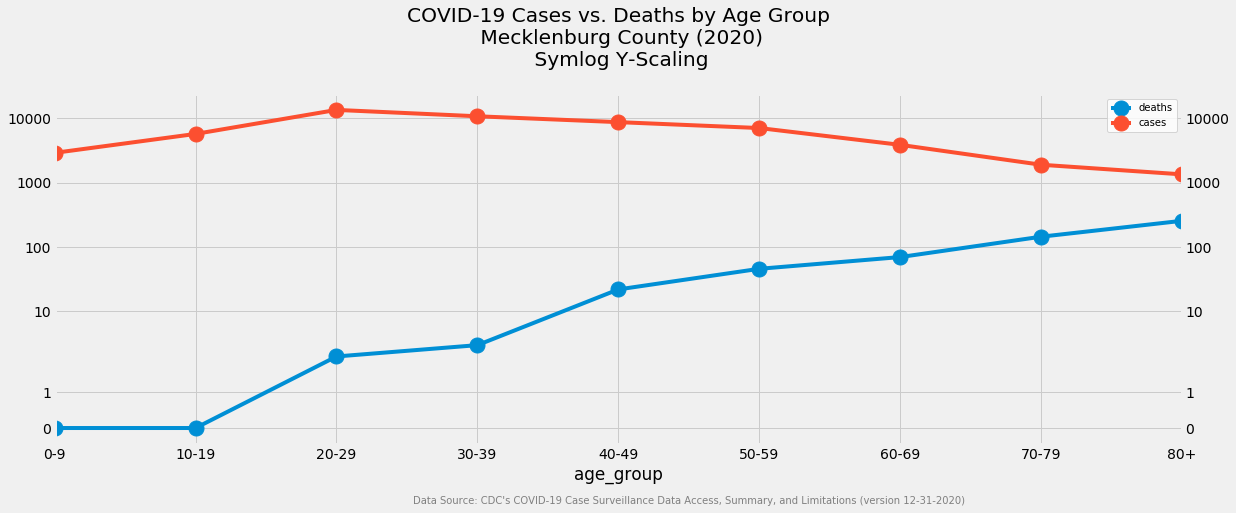

In [19]:
with plt.style.context('fivethirtyeight'):
    ax1 = oba.reset_index().plot(x='age_group',
                       y=['deaths', 'total'], figsize=(18,6),
                      title='COVID-19 Cases vs. Deaths by Age Group\n Mecklenburg County (2020)\n Symlog Y-Scaling\n',
                                 marker='o', markersize=15)
plt.yscale("symlog")

ax1.set_xticklabels(['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']);
ax1.set_yticklabels([0, 1, 10, 100, 1000, 10000]);
ax1.tick_params(labelright=True)
ax1.legend(['deaths', 'cases']);

ax1.text(4.50, -2.5, "Data Source: CDC's COVID-19 Case Surveillance Data Access, Summary, and Limitations (version 12-31-2020)",
               ha='center', va='bottom', wrap=True, color='grey');

## save chart to file
# ax.figure.savefig(IMAGES/'cases_vs_deaths_by_age_symlog.png', bbox_inches='tight', dpi=200);

In [20]:
## some references
## label group barchart: https://stackoverflow.com/questions/52080991/display-percentage-above-bar-chart-in-matplotlib
## https://stackoverflow.com/questions/65655829/absolute-values-and-percentage-values-side-by-side-in-bar-chart-matplotlib/65725322#65725322


In [21]:
total_counts = pd.DataFrame(oba[['Missing', 'surv', 'Unknown', 'deaths']].sum().astype(int)).T
total_counts

death_yn,Missing,surv,Unknown,deaths
0,18,55222,1,544


<br><br>

### Deaths by Age Group
---


In [22]:
# df[(df['death_yn'].str.contains('Unknown'))]
# df[(df['death_yn'].str.contains('Missing'))]

In [23]:
## Filtering rows where 'death_yn' is 'yes'
## did this to plot every single row, and compare it with other columns
deaths_yes = df[(df['death_yn'].str.contains('Yes'))]

# deaths.dtypes
# deaths.death_yn.unique()
#deaths_yes.head(2)

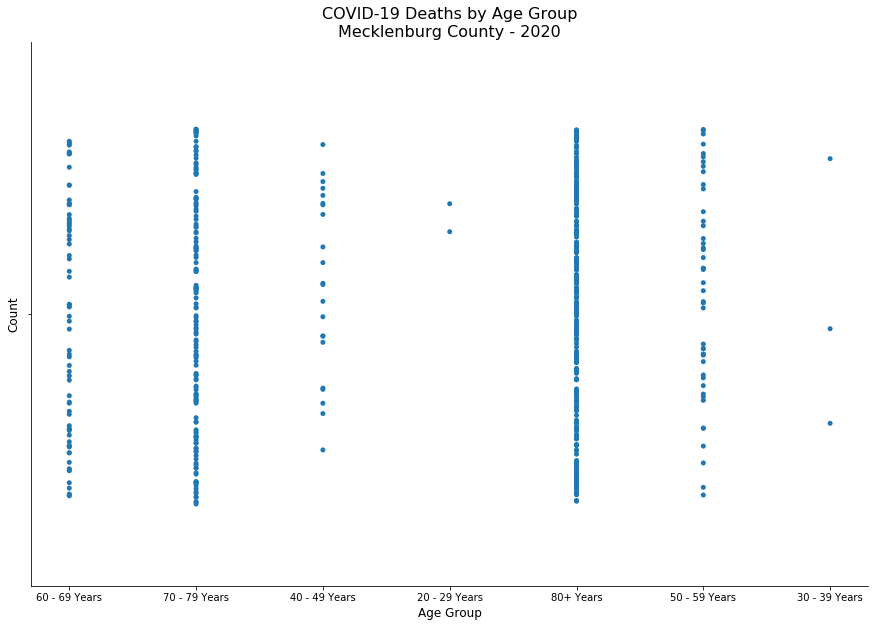

In [24]:
## *** TO DO: SORT THE X-AXIS ASCENDING ***

## scatter plot death count by age --plots all cases -- maybe try different colors for underlying condition
ax = plt.subplots(figsize=(15,10))

## stripplot
ax = sns.stripplot(x='age_group', hue='death_yn', data=deaths_yes, jitter=0.35)
# ax= sns.stripplot(x='death_yn', y='age_group', data=deaths) ## gets error
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_title('COVID-19 Deaths by Age Group\nMecklenburg County - 2020', fontsize =16)
ax.set_xlabel('Age Group', fontsize=12)
ax.set_ylabel('Count', fontsize=12);

## countplot https://stackoverflow.com/questions/34251641/how-to-make-a-bar-plot-of-non-numerical-data-in-pandas

<br><br>
### Deahts and Underlying Medical Conditions By Age Group
---

medcond_yn

In [25]:
med_cond = deaths_yes.groupby(['age_group','medcond_yn'])['medcond_yn'].count().unstack().reset_index().fillna(0) 
med_cond = med_cond.rename(columns={'No': 'no_other', 'Yes': 'other_cond', 'Unknown': 'unknown'})
med_cond['ttl_deaths'] = (med_cond['no_other']+med_cond['unknown']+med_cond['other_cond']).astype(int)
med_cond['no_other'] = med_cond['no_other'].astype(int)
med_cond['unknown'] = med_cond['unknown'].astype(int)
med_cond['other_cond'] = med_cond['other_cond'].astype(int)
med_cond['no_other_p'] = ((med_cond['no_other']*100)/med_cond['ttl_deaths']).round(1)
med_cond['other_cond_p'] = ((med_cond['other_cond']*100)/med_cond['ttl_deaths']).round(1)
med_cond['unknown_p'] = ((med_cond['unknown']*100)/med_cond['ttl_deaths']).round(1)

med_cond

medcond_yn,age_group,no_other,unknown,other_cond,ttl_deaths,no_other_p,other_cond_p,unknown_p
0,20 - 29 Years,0,2,0,2,0.0,0.0,100.0
1,30 - 39 Years,0,0,3,3,0.0,100.0,0.0
2,40 - 49 Years,4,9,9,22,18.2,40.9,40.9
3,50 - 59 Years,1,19,26,46,2.2,56.5,41.3
4,60 - 69 Years,1,29,40,70,1.4,57.1,41.4
5,70 - 79 Years,2,47,96,145,1.4,66.2,32.4
6,80+ Years,11,91,154,256,4.3,60.2,35.5


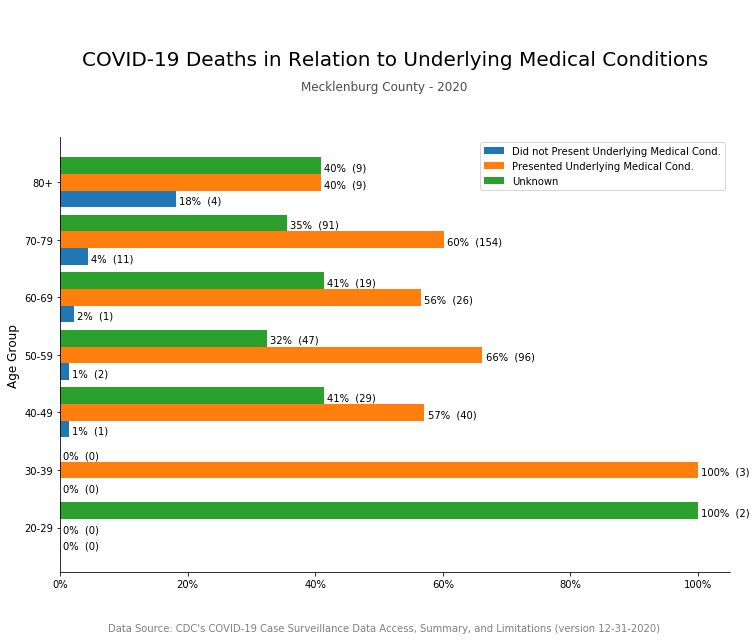

In [26]:
## horizontal barchart med_cond by age group with labels

med_cond_sorted = med_cond.sort_values('no_other_p')
cmaps = 'Purples'
no_other = med_cond_sorted['no_other_p']
other = med_cond_sorted['other_cond_p']
unknown = med_cond_sorted['unknown_p']
y_labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']

y = np.arange(len(y_labels))

width = 0.29
fig, ax = plt.subplots(figsize=(12,8))

rects1 = ax.barh(y, no_other, width, label='No Other Medical Cond')
rects2 = ax.barh(y + width, other, width, label='Other Medical Cond')
rects3 = ax.barh(y + width*2, unknown, width, label='unknown')
plt.yticks(y + width, y_labels);

qtys_no = med_cond_sorted['no_other']
qtys_other = med_cond_sorted['other_cond']
qtys_unk = med_cond_sorted['unknown']

# # Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_title('\n\nCOVID-19 Deaths in Relation to Underlying Medical Conditions\n\n\n', fontsize =20)
fig.suptitle('Mecklenburg County - 2020', color='0.3')
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Age Group', fontsize=12)
ax.legend(['Did not Present Underlying Medical Cond.', 'Presented Underlying Medical Cond.', 'Unknown']);

text1= fig.text(0.50, 0.02, "Data Source: CDC's COVID-19 Case Surveillance Data Access, Summary, and Limitations (version 12-31-2020)",
               ha='center', va='bottom', wrap=True, color='grey')

def autolabel(rects, qtys):
    for rect, qty in zip(rects, qtys):
        width = rect.get_width()
        ax.text(width + 0.5, rect.get_y() + rect.get_height()/5.,
        f'{int(width)}%  ({qty})', fontsize=10)

autolabel(rects1, qtys_no)
autolabel(rects2, qtys_other)
autolabel(rects3, qtys_unk)
## reference: https://stackoverflow.com/questions/34292076/pandas-bar-plot-how-to-annotate-grouped-horizontal-bar-charts

## Save chart as png file
# ax.figure.savefig(IMAGES/'deaths_med_conds.png', bbox_inches='tight', dpi=200);

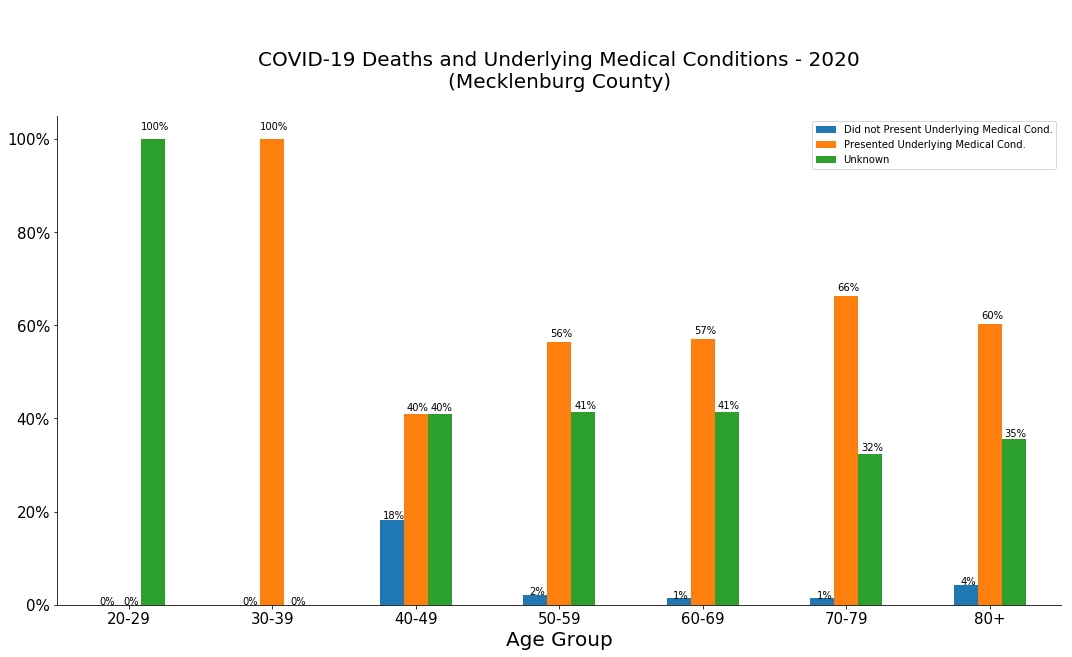

In [27]:
# Plot med_cond vertical barchart

ax = med_cond.plot(x='age_group', y=['no_other_p', 'other_cond_p', 'unknown_p'],
                kind='bar',
                figsize=(18,9),
                rot=0,
                fontsize=15)

## labels on top of bars
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{int(height)}%', (x + width/1.7, y + height*1.02), ha='center')
    
ax.set_title('\n\nCOVID-19 Deaths and Underlying Medical Conditions - 2020\n(Mecklenburg County)\n', fontsize =20)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_xticklabels(['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']);
ax.set_xlabel('Age Group', fontsize=20)
ax.legend(['Did not Present Underlying Medical Cond.', 'Presented Underlying Medical Cond.', 'Unknown']);

# # Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


## Save chart as png file
# ax.figure.savefig(IMAGES/'d_s_rate-by_age.png' )

### Total Deaths and Underlying Medical Conditions - All Ages
---

In [28]:
## total percentage deaths with other medical conditions - All Ages
total_conds = pd.DataFrame(med_cond[['no_other', 'other_cond', 'unknown']].sum().astype(int)).T
total_conds['total_deaths'] = total_conds['no_other'] + total_conds['other_cond'] + total_conds['unknown']
total_conds['no_other_p'] = ((total_conds['no_other'] * 100) / total_conds['total_deaths']).round(1)
total_conds['other_cond_p'] = ((total_conds['other_cond'] * 100) / total_conds['total_deaths']).round(1)
total_conds['unknown_p'] = ((total_conds['unknown'] * 100) / total_conds['total_deaths']).round(1)
# total_conds.info()
total_conds

medcond_yn,no_other,other_cond,unknown,total_deaths,no_other_p,other_cond_p,unknown_p
0,19,328,197,544,3.5,60.3,36.2


In [29]:
## *** WORKING ON SORTING THE Y AXIS SO THE BARS GO IN ASCENDENT ORDER ***

ttl_dths1 = total_conds[['no_other_p', 'other_cond_p', 'unknown_p']].loc[0] #.tolist()
# ttl_dths1 = ttl_dths.sort_values(ttl_dths1[0])
# ttl_dths1 = ttl_dths1.sort()
# print(ttl_dths1)
ttl_dths1 = ttl_dths1.reset_index()
ttl_dths1
# ttl_dths1.sort_values(by=0)
# ttl_dths1.dtypes

,medcond_yn,0
0,no_other_p,3.5
1,other_cond_p,60.3
2,unknown_p,36.2


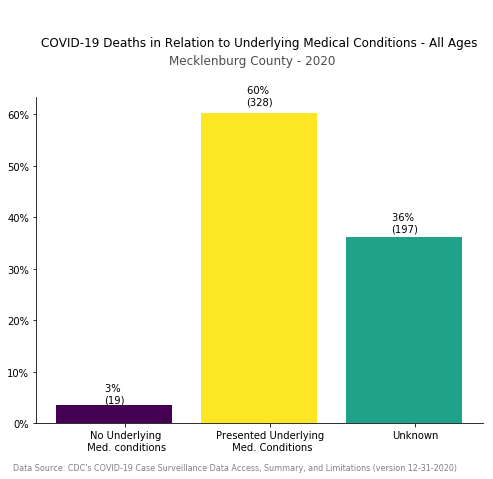

In [30]:
## plotting % of deaths related to LTC - all ages


fig, ax = plt.subplots(figsize=(8,6))

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_title('\n\nCOVID-19 Deaths in Relation to Underlying Medical Conditions - All Ages\n\n\n')
fig.suptitle('Mecklenburg County - 2020', color='0.3')

plt.text(-0.7, -9, "Data Source: CDC's COVID-19 Case Surveillance Data Access, Summary, and Limitations (version 12-31-2020)",
         color='grey', fontsize=(8))

ttl_dths = total_conds[['no_other_p', 'other_cond_p', 'unknown_p']].loc[0].tolist()
x_labels = ['No Underlying\n Med. conditions', 'Presented Underlying\n Med. Conditions', 'Unknown']

x = np.arange(len(x_labels))
width = 0.15

colors = lambda ttl_dths: (ttl_dths - np.min(ttl_dths)) / (np.max(ttl_dths) - np.min(ttl_dths))

rects = ax.bar(x_labels, ttl_dths, color=my_cmap(colors(ttl_dths)))

plt.xticks(x + width / 2, x_labels);

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# # quantity values
ltc_qty = total_conds[['no_other', 'other_cond', 'unknown']].loc[0].tolist()
# ltc_qty

def autolabel(rects, qtys):
    for rect, qty in zip(rects, qtys):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2., 1.02 * height,
               f'{int(height)}% \n({qty})',
               ha='center', va='bottom')

autolabel(rects, ltc_qty)

## Save chart as png file -- fix text cutting off and high resolution: https://www.youtube.com/watch?v=C8MT-A7Mvk4
# ax.figure.savefig(IMAGES/'total_deaths_Underlying_conditions.png', bbox_inches='tight', dpi=200);

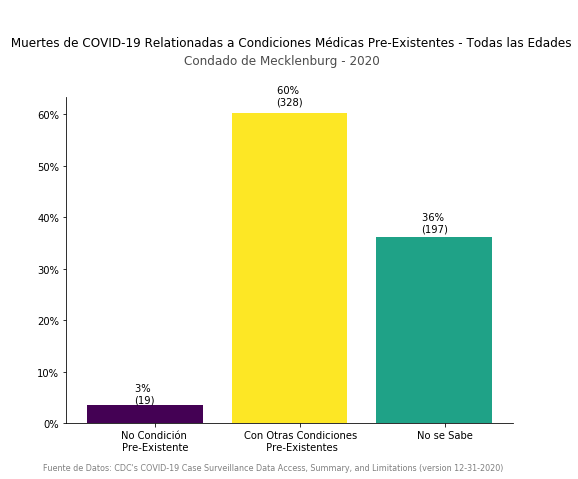

In [31]:
## ESPAÑOL plotting % of deaths related to LTC

fig, ax = plt.subplots(figsize=(8,6))

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_title('\n\n Muertes de COVID-19 Relationadas a Condiciones Médicas Pre-Existentes - Todas las Edades\n\n\n')
fig.suptitle('Condado de Mecklenburg - 2020', color='0.3')

plt.text(-0.7, -9, "Fuente de Datos: CDC's COVID-19 Case Surveillance Data Access, Summary, and Limitations (version 12-31-2020)",
         color='grey', fontsize=(8))


ttl_dths = total_conds[['no_other_p', 'other_cond_p', 'unknown_p']].loc[0].tolist()
x_labels = ['No Condición \nPre-Existente', 'Con Otras Condiciones\n Pre-Existentes', 'No se Sabe']

x = np.arange(len(x_labels))
width = 0.15

rects = ax.bar(x_labels, ttl_dths, color=my_cmap(colors(ttl_dths)))

plt.xticks(x + width / 2, x_labels);

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# # quantity values
ltc_qty = total_conds[['no_other', 'other_cond', 'unknown']].loc[0].tolist()
# ltc_qty

def autolabel(rects, qtys):
    for rect, qty in zip(rects, qtys):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2., 1.02 * height,
               f'{int(height)}% \n({qty})',
               ha='center', va='bottom')

autolabel(rects, ltc_qty)

## Save chart as png file & fix text cutting off and high resolution: https://www.youtube.com/watch?v=C8MT-A7Mvk4
# ax.figure.savefig(IMAGES/'total_deaths_Underlying_conditions-ESP.png', bbox_inches='tight', dpi=200);

### Hospitalizations
---

In [32]:
## unique values and number of times
# hosp = df['hosp_yn'].value_counts().rename_axis('unique_val').reset_index(name='counts')
hosp = pd.DataFrame(df['hosp_yn'].value_counts()).T
# df_filtered.stack().value_counts()
hosp = hosp.rename(columns = {'No': 'no_hosp', 'Unknown': 'unknown', 'Yes':'yes_hosp', 'Missing': 'missing'})

hosp['no_hosp_p'] = ((hosp['no_hosp'] *100) / total_cases).round(0)
hosp['unknown_p'] =((hosp['unknown'] * 100) / total_cases).round(0)
hosp['yes_hosp_p'] = ((hosp['yes_hosp'] * 100) / total_cases).round(0)
hosp['missing_p'] = ((hosp['missing'] * 100) / total_cases).round(2)

hosp
## reference: https://dfrieds.com/data-analysis/value-counts-python-pandas.html
## reference: https://stackoverflow.com/questions/47136436/python-pandas-convert-value-counts-output-to-dataframe/47136484

,no_hosp,unknown,yes_hosp,missing,no_hosp_p,unknown_p,yes_hosp_p,missing_p
hosp_yn,29678,24490,1619,14,53.0,44.0,3.0,0.03


In [33]:
hosp['yes_hosp'].tolist()

[1619]

### Plotting Hospitalization data - All Ages
---

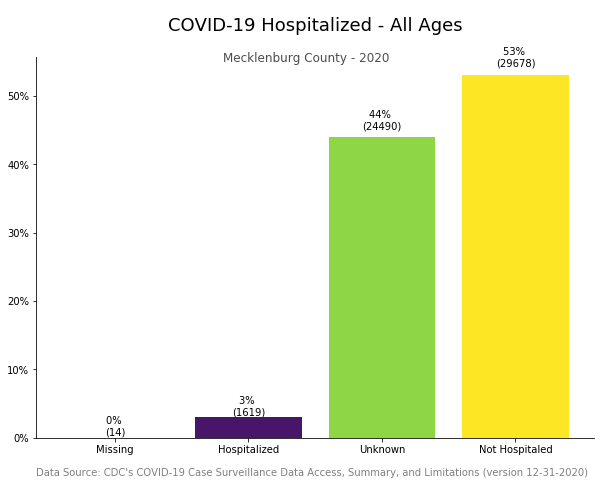

In [34]:
## plotting hospitalized
hosp_pct = hosp[['missing_p', 'yes_hosp_p', 'unknown_p', 'no_hosp_p']].loc['hosp_yn'].tolist()
hosp_qty = hosp[['missing', 'yes_hosp', 'unknown', 'no_hosp']].loc['hosp_yn'].tolist() ## quantity values for labels

x_labels = ['Missing', 'Hospitalized', 'Unknown', 'Not Hospitaled']
x_bars = np.arange(len(x_labels))

fig, ax = plt.subplots(figsize=(10,7))

rects = ax.bar(x_labels, hosp_pct, color=my_cmap(colors(hosp_pct)))

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_title('COVID-19 Hospitalized - All Ages\n', fontsize=(18))
fig.suptitle('\n\n\nMecklenburg County - 2020', color='0.3')
plt.annotate("Data Source: CDC's COVID-19 Case Surveillance Data Access, Summary, and Limitations (version 12-31-2020)", 
             (0,0), (0, -0.1), color='grey', xycoords='axes fraction');

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

def autolabel(rects, qtys):
    for rect, qty in zip(rects, qtys):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2., 1.02 * height,
               f'{int(height)}% \n({qty})',
               ha='center', va='bottom')

autolabel(rects, hosp_qty)

## Save chart as png file
# ax.figure.savefig(IMAGES/'total_hospitalized.png', bbox_inches='tight', dpi=200);

### Covid Cases in Relation to Admissions to ICU
---

In [35]:
icu = df['icu_yn'].value_counts()
icu

Unknown    55331
Yes          245
No           205
Missing       20
Name: icu_yn, dtype: int64

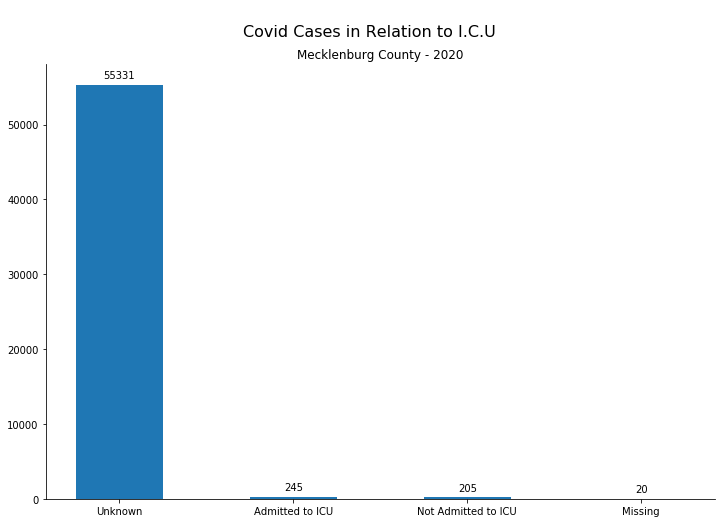

In [36]:
## plot
bar1 = icu
x_labels = ['Unknown', 'Admitted to ICU', 'Not Admitted to ICU', 'Missing']

# x_labels
x = np.arange(len(x_labels))
# x
barwidth = 0.5
fig, ax = plt.subplots(figsize = (12,8))
rect = ax.bar(x, bar1, width=barwidth)
plt.xticks(x, x_labels);
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.suptitle('\nCovid Cases in Relation to I.C.U', fontsize=16)
ax.set_title('Mecklenburg County - 2020');

def autolabel_v_1ln_qty(rects):
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom
    for rect in rects:
        height = rect.get_height()
        label_position = height + (y_height * 0.01)
        ax.text(rect.get_x() + rect.get_width() / 2.,
               label_position,
               f'{int(height)}',
               ha='center', va='bottom')

autolabel_v_1ln_qty(rect)

### Hospitalized vs. I.C.U
---

In [37]:
# pd.set_option('display.max_rows', None)
icu_yes = df[(df['icu_yn'].str.contains('Yes'))]
icu_yes_total = icu_yes['icu_yn'].count()
icu_yes_total

245

In [38]:
data = {'total_hosp': [hosp.iloc[0]['yes_hosp'].astype(int)], 
       'icu': [icu_yes_total]}
icu_hosp = pd.DataFrame(data)

icu_hosp['no_icu'] = (icu_hosp['total_hosp'] - icu_hosp['icu'])
icu_hosp['total_hosp_p'] = ((icu_hosp['total_hosp'] * 100) / icu_hosp['total_hosp']).round()
icu_hosp['icu_p'] = ((icu_hosp['icu'] * 100) / icu_hosp['total_hosp']).round()
icu_hosp['no_icu_p'] = ((icu_hosp['no_icu'] * 100) / icu_hosp['total_hosp']).round()
icu_hosp


,total_hosp,icu,no_icu,total_hosp_p,icu_p,no_icu_p
0,1619,245,1374,100.0,15.0,85.0


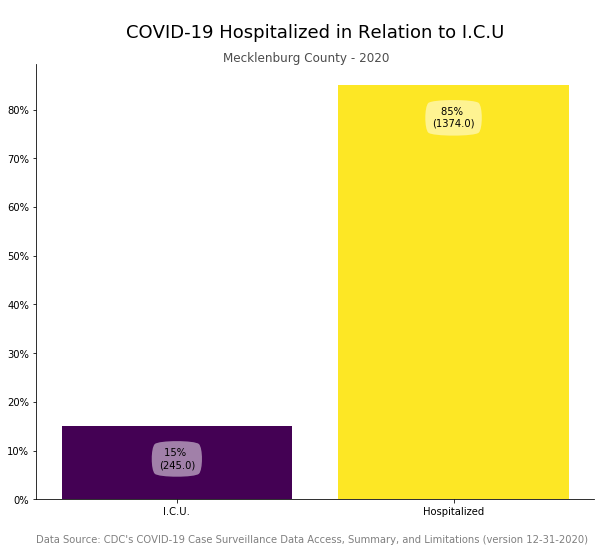

In [39]:
## plotting total hospitalized and total in ICU
pct = [icu_hosp.iloc[0]['icu_p'], icu_hosp.iloc[0]['no_icu_p']]
## reference: https://www.delftstack.com/howto/python-pandas/how-to-get-a-value-from-a-cell-of-a-dataframe/
pct
qty = [icu_hosp.iloc[0]['icu'], icu_hosp.iloc[0]['no_icu']]
x_labels = ['I.C.U.', 'Hospitalized']

fig, ax = plt.subplots(figsize=(10,8))

## reference: https://python-graph-gallery.com/5-control-width-and-space-in-barplots/
bar_pos = [0,0.12] ## bar position on x axis
bar_width = 0.10 ## bar width

bar_colors = lambda pct: (pct - np.min(pct)) / (np.max(pct) - np.min(pct))
rects = ax.bar(bar_pos, pct, width=bar_width, color=my_cmap(bar_colors(pct)))

plt.xticks(bar_pos, x_labels)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_title('COVID-19 Hospitalized in Relation to I.C.U\n', fontsize=(18))
fig.suptitle('\n\n\nMecklenburg County - 2020', color='0.3')
plt.annotate("Data Source: CDC's COVID-19 Case Surveillance Data Access, Summary, and Limitations (version 12-31-2020)", 
             (0,0), (0, -0.1), color='grey', xycoords='axes fraction');
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
box = dict(boxstyle='round4', pad=0.8, facecolor='white', alpha=0.5, edgecolor='none')

## reference fixing height of bar labels: http://composition.al/blog/2015/11/29/a-better-way-to-add-labels-to-bar-charts-with-matplotlib/ 
def autolabel(rects, qtys):
    (y_bottom, y_top) = ax.get_ylim() 
    y_height = y_top - y_bottom ## the hight of each individual bar
    for rect, qty in zip(rects, qtys):
        height = rect.get_height()
        label_position = height + (y_height * -0.1) ## exact position for the bar label
        ax.text(rect.get_x() + rect.get_width() / 2., label_position,
               f'{int(height)}% \n({qty})',
               ha='center', va='bottom', bbox=box)
autolabel(rects, qty)


## Save chart as png file
# ax.figure.savefig(IMAGES/'total_hospitalized.png', bbox_inches='tight', dpi=200);


### pandas reference:
- get a value from a cell: https://www.delftstack.com/howto/python-pandas/how-to-get-a-value-from-a-cell-of-a-dataframe/
- remove square brackets: ## reference: https://stackoverflow.com/questions/38147447/how-to-remove-square-bracket-from-pandas-dataframe


### Bar Labels:

- fixing height of bar labels: http://composition.al/blog/2015/11/29/a-better-way-to-add-labels-to-bar-charts-with-matplotlib/ 
- explanation of y_lim(): https://www.geeksforgeeks.org/matplotlib-pyplot-ylim-in-python/#:~:text=The%20ylim()%20function%20in,limits%20of%20the%20current%20axes.

### Bar plots references:
- control width and space of bars: https://python-graph-gallery.com/5-control-width-and-space-in-barplots
- set bar graph when there is only one bar: https://stackoverflow.com/questions/23217902/how-to-set-matplotlib-bar-graph-width-when-there-is-only-one-data

### bbox references:
- text properties: https://matplotlib.org/3.1.1/tutorials/text/text_props.html
- properties that can be applies to bbox: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.patches.Rectangle.html#matplotlib.patches.Rectangle
- adjusting textbackground transparency: https://stackoverflow.com/questions/23696898/adjusting-text-background-transparency

- list of matplotlib colors: https://matplotlib.org/3.1.0/gallery/color/named_colors.html
- several text lines in one box with different colors each: https://stackoverflow.com/questions/17086847/box-around-text-in-matplotlib

- some fancy box properties: http://www.futurile.net/2016/03/01/text-handling-in-matplotlib/
- fancy box styles: https://matplotlib.org/3.3.2/gallery/shapes_and_collections/fancybox_demo.html

### Textbox

- placing texboxes: https://matplotlib.org/3.1.1/gallery/recipes/placing_text_boxes.html